# Simon's algorithm:

1. In this algorithm, we need to find a bit string $s \in \{0, 1\}^{n}$, given a two-one function (two inputs mapped to the same output) $f$ such that $f(x)=f(x \oplus s)$.

2. If we get a bit-string $s=\{0\}^n$ then the function is a one-one function and if $s$ is any bit string such that $s = {\{0,1\}^n}  \setminus \{0\}^n$, then $s$ is a two-one function. The goal of this algorithm is to find whether $f(x)$ is a two-one or one-one.

3. This algorithm is a case of hybrid (classical-quantum) algorithm, where the quantum basis states are output using a quantum computer or an emulator and the post processing for find the bitstring $s$ is performed on a classical computer using methods such as gaussian elimination. 



In [1]:
from qiskit import *
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
import numpy as np


%matplotlib inline

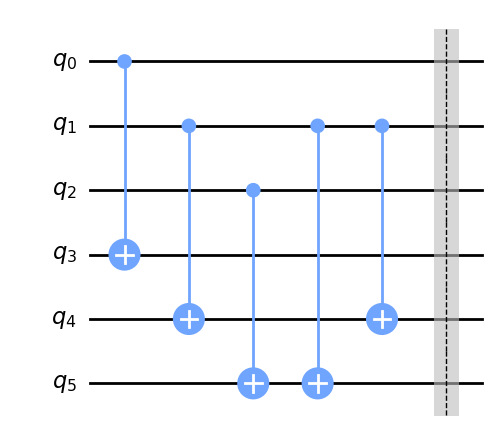

In [139]:
#creating a quantum oracle for n-bits secret string

# Creating a quantum circuit of $n$ qubits, where each of the $x$ and $y$ registers get $\frac{n}{2}$ qubits.

x_num_qubits = 3 # num qubits for register x
secret_str = '110'

qc = QuantumCircuit(2*x_num_qubits)

#  first step in building the oracle for simon's algoithm is to entangle all the qubits 
# in the y register with the qubits in the x register. This can be achieved by using a set of CX gates.

for k in range(x_num_qubits):
    qc.cx(k, k + x_num_qubits)



for k in range(x_num_qubits-1, -1, -1):
    if secret_str[k] == '1':
        
        reverse_secret_str = secret_str[::-1]
        for j in range(x_num_qubits-1, -1, -1):
            if reverse_secret_str[j] == '1':
                qc.cx(k, j+x_num_qubits)

        break        
qc.barrier()            
display(qc.draw('mpl'))

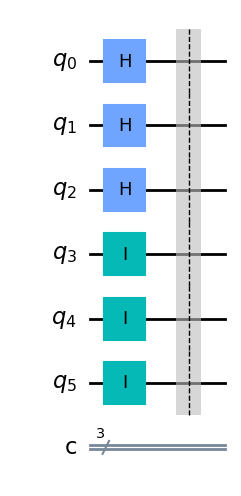

In [140]:
# Step 1: Apply Hadamard gates to the qubits in x register

x_num_qubits = 3
num_cbits = x_num_qubits
simon_qc = QuantumCircuit(2*x_num_qubits, num_cbits)

for i in range(x_num_qubits):
    simon_qc.h(i)

for k in range(x_num_qubits, 2*x_num_qubits, 1):
    simon_qc.i(k)

simon_qc.barrier()

display(simon_qc.draw('mpl'))     

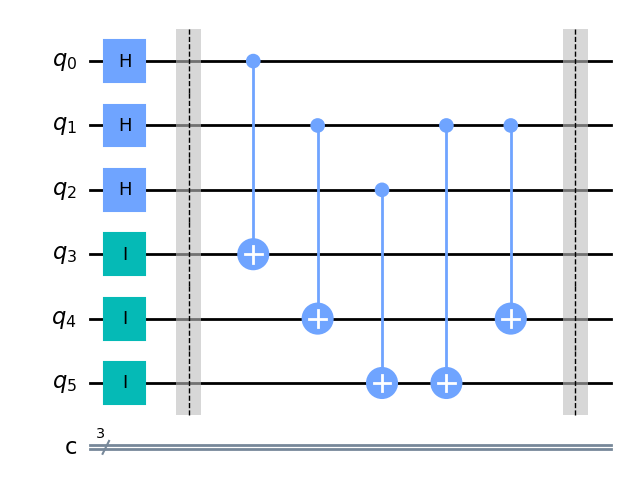

In [141]:
# Step 2: Add the oracle to the simon quantum circuit

simon_qc = simon_qc.compose(qc)

simon_qc.draw('mpl')

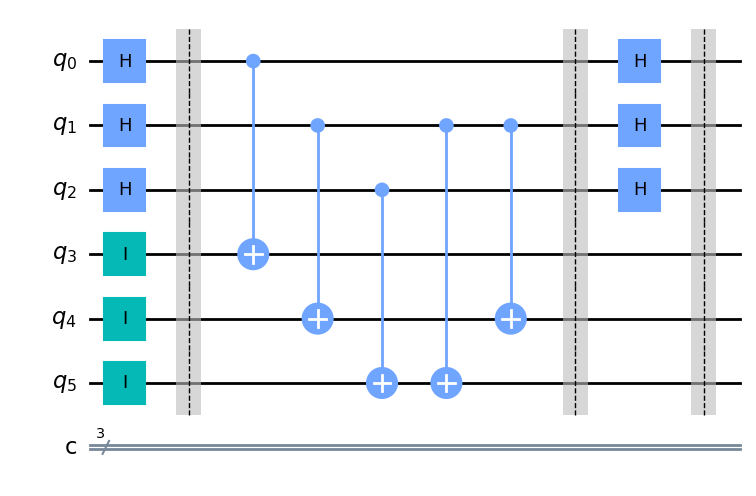

In [142]:
# Step 3: Apply hadamard gates to the qubits in x register

for k in range(x_num_qubits):
    simon_qc.h(k)

simon_qc.barrier()
display(simon_qc.draw('mpl'))


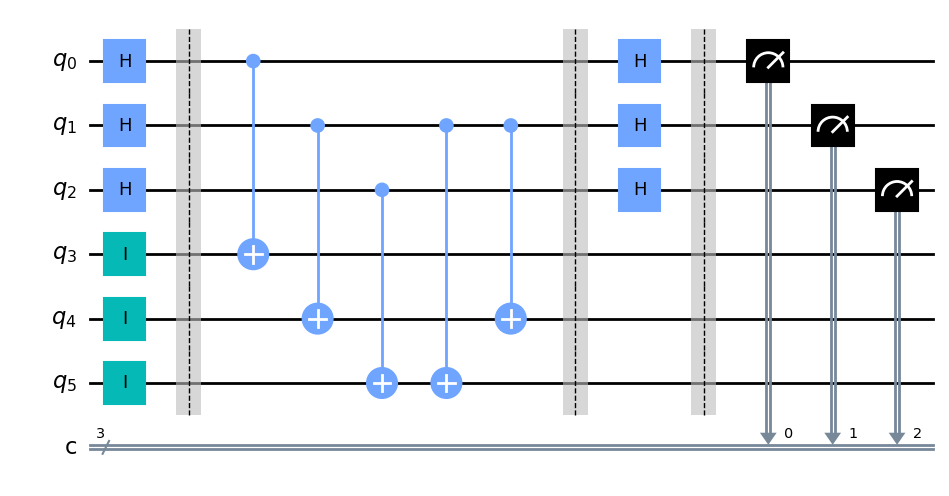

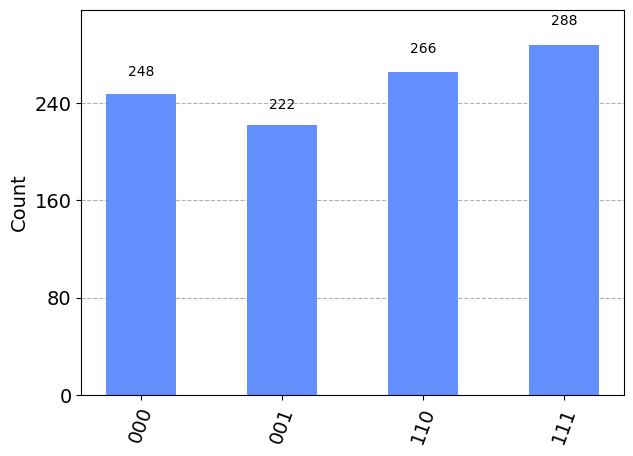

In [143]:
# Step 4: Measure the qubits from the x-register

for i in range(x_num_qubits):
    simon_qc.measure(i,i)

display(simon_qc.draw('mpl'))

aer_backend = Aer.get_backend('aer_simulator')

counts = execute(simon_qc, backend = aer_backend, shots = 1024).result().get_counts()

plot_histogram(counts)



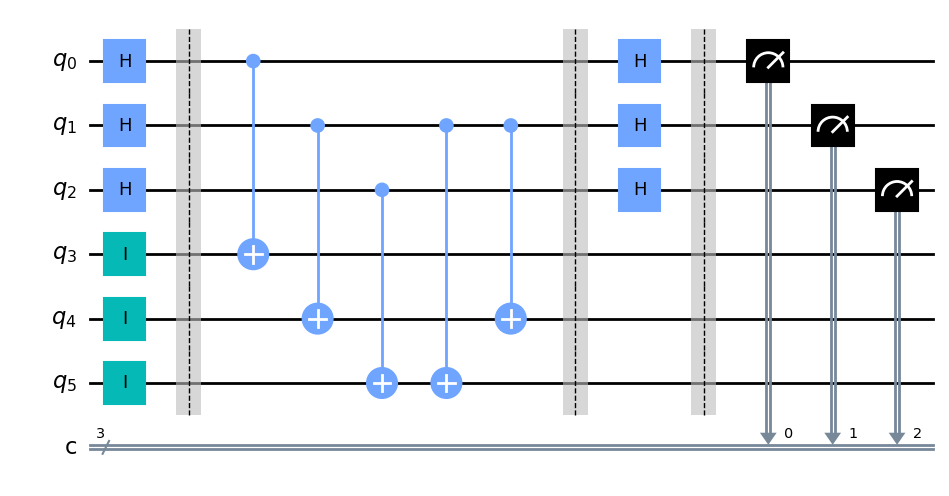

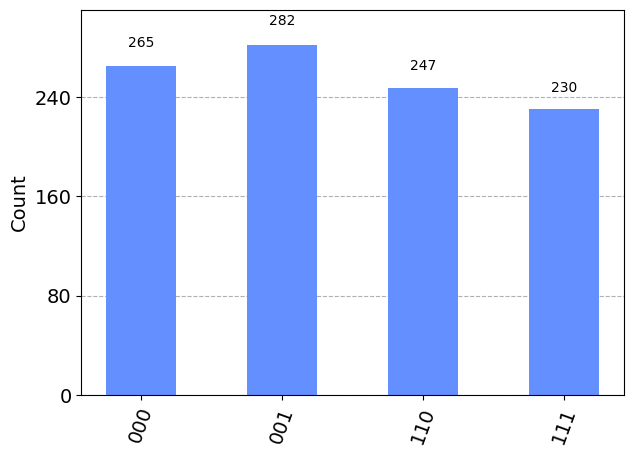

In [150]:
# puting it all together

#creating a quantum oracle for n-bits secret string

# Creating a quantum circuit of $n$ qubits, where each of the $x$ and $y$ registers get $\frac{n}{2}$ qubits.

x_num_qubits = 3 # num qubits for register x
secret_str = '110'

qc = QuantumCircuit(2*x_num_qubits)

#  first step in building the oracle for simon's algoithm is to entangle all the qubits 
# in the y register with the qubits in the x register. This can be achieved by using a set of CX gates.

for k in range(x_num_qubits):
    qc.cx(k, k + x_num_qubits)



for k in range(x_num_qubits-1, -1, -1):
    if secret_str[k] == '1':
        
        reverse_secret_str = secret_str[::-1]
        for j in range(x_num_qubits-1, -1, -1):
            if reverse_secret_str[j] == '1':
                qc.cx(k, j+x_num_qubits)

        break        
qc.barrier()            
# display(qc.draw('mpl'))



# Step 1: Apply Hadamard gates to the qubits in x register
x_num_qubits = 3
num_cbits = x_num_qubits
simon_qc = QuantumCircuit(2*x_num_qubits, num_cbits)

for i in range(x_num_qubits):
    simon_qc.h(i)

for k in range(x_num_qubits, 2*x_num_qubits, 1):
    simon_qc.i(k)

simon_qc.barrier()
# display(simon_qc.draw('mpl'))  





# Step 2: Add the oracle to the simon quantum circuit
simon_qc = simon_qc.compose(qc)
# simon_qc.draw('mpl')




# Step 3: Apply hadamard gates to the qubits in x register
for k in range(x_num_qubits):
    simon_qc.h(k)
simon_qc.barrier()
# display(simon_qc.draw('mpl'))


# Step 4: Measure the qubits from the x-register
for i in range(x_num_qubits):
    simon_qc.measure(i,i)
display(simon_qc.draw('mpl'))
aer_backend = Aer.get_backend('aer_simulator')
counts = execute(simon_qc, backend = aer_backend, shots = 1024).result().get_counts()
plot_histogram(counts)


# Step 5: Postprocessing

If we take the dot proct of our secret string with the states show in the histogram, we get 0 which proves that our results are correct. In our case, our secret bit string is 110 and our output basis states are 000, 001, 110 and 111. Dot products of these states with 110 are zeros. 


Assume that we dont know the secret string and the string s is in form of $ s ={s_2}{s_1}{s_0}$. Then dot product with of the states $000$ gives us $0$. $s.000 = 0$, ${s_2}{s_1}{s_0}.000$ = ${s_2}.0 {\oplus}{s_1}.0 \oplus {s_0}.0 = 0$, which give us $0 + 0 + s_2 = 0$, which implies that $s_2 = 0$. So, we have found the value of one of the bit in out secret bit string. Now we need to find the other values namely $s_0$ and $s_1$. 

Now, we write our secret string as $s = {s_2}{s_1}{0}$, since $s_0=0$. Dot product of $s$ with $110$ gives us $s_2 + s_1=0$, which means either $s_2=s_1=0$ or $s_2=s_1=1$.

Now, dot product of $s$ with $111$ gives $s_2 + s_1=0$, which means either $s_2=s_1=0$ or $s_2=s_1=1$.

$s_2=s_1=1$ definitely because if $s_2=s_1=0$ then $s=000$, then we will have a one-one function and our output will be all the 8 basis states instead of the 4 basis states as the output. Since the output consists of only 4 out of 8 basis states then $f(x)$ is a two-one function and hence $s=110$ is the appropriate answer for the secret bit string. 

Note: In many cases, determining the secret bit string will not be easy as the example demonstrated here. We will need to use gaussian elimination in order to find the secret bit string.
 